# Intro. Exploratory Data Analysis

## Goals
To understand the relationship between vehicle horsepower and fuel economy.
To provide insights that can guide automotive manufacturers in optimizing vehicle design for better fuel efficiency
To develop a reliable predictive model that can be used for future analysis and decision-making.

### The Questions
1) How does horsepower affect fuel economy?
2) Can we create a reliable predictive model for Mileage Per Gallon (MPG) based Vehicle Horse Power (HP)?

### Dataset
The dataset used for this analysis is the **FuelEconomy.csv**, which includes the following variables:
+ Independent Variable (X): Vehicle Horse Power (HP)
+ Dependent Variable (Y): Mileage Per Gallon (MPG)



### 1) Exploratory Data Analysis
a) Data Loading
Import the "FuelEconomy.csv" dataset into the analysis environment.

In [1]:
#!pip install --upgrade seaborn
#!pip install --upgrade pandas

#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset 
df = pd.read_csv('FuelEconomy.csv')

df.head()

,Horse Power,Fuel Economy (MPG)
0,118.770799,29.344195
1,176.326567,24.695934
2,219.262465,23.952010
3,187.310009,23.384546
4,218.594340,23.426739



b) Conduct data visualization and preliminary analysis to identify trends, patterns, and anomalies within the dataset.

In [3]:
df.describe()

,Horse Power,Fuel Economy (MPG)
count,100.000000,100.000000
mean,213.676190,23.178501
std,62.061726,4.701666
min,50.000000,10.000000
25%,174.996514,20.439516
50%,218.928402,23.143192
75%,251.706476,26.089933
max,350.000000,35.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Horse Power         100 non-null    float64
 1   Fuel Economy (MPG)  100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


Text(34.875, 0.5, 'MPG')

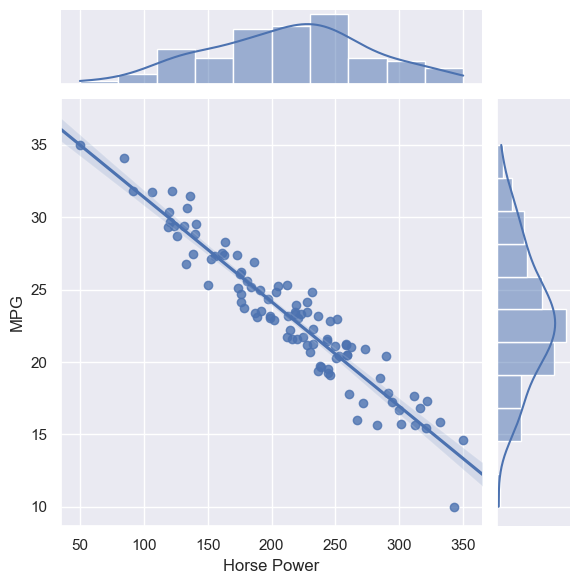

In [5]:
# Visualize data 
sns.set_theme(style='darkgrid')
sns.jointplot(x='Horse Power', y='Fuel Economy (MPG)', data=df, kind='reg', truncate=False)
plt.ylabel('MPG')

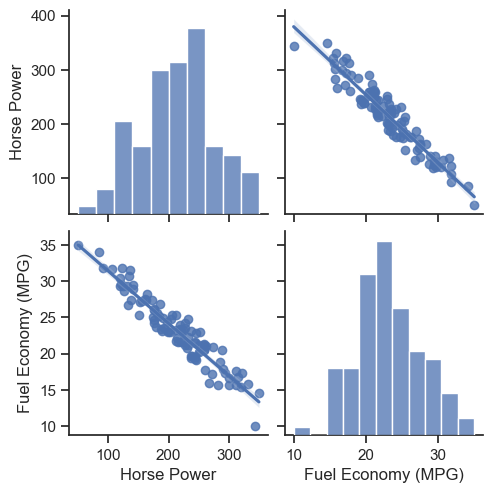

In [6]:
sns.set_theme(style="ticks")
sns.pairplot(df, kind='reg')
plt.show()

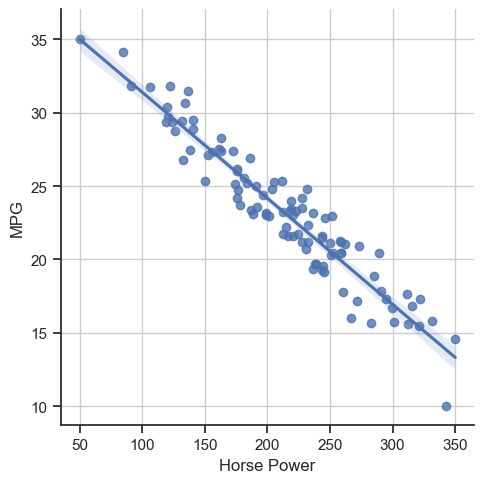

In [7]:
sns.set_theme(style="ticks")
sns.lmplot(x='Horse Power', y='Fuel Economy (MPG)', data=df)
plt.ylabel('MPG')
plt.grid()
plt.show()

### 2) Create Testing and Training Dataset
Split the dataset into training (80%) and testing (20%) subsets to facilitate model training and evaluation.

In [8]:
X = df['Horse Power']  # Input to the Model
y = df['Fuel Economy (MPG)']  # Output to the Model


In [9]:
# Convert X and y into arrays
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  

### 3) Model Development
Utilize Scikit-Learn to implement a simple linear regression model that predicts fuel economy based on horsepower.


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
# Training model 
SimpleLinearRegression = LinearRegression(fit_intercept=True)
SimpleLinearRegression.fit(X_train, y_train)

LinearRegression()

In [12]:

print('Linear Model Coefficient (m):', SimpleLinearRegression.coef_)
print('Linear Model Coefficient (b):', SimpleLinearRegression.intercept_)


Linear Model Coefficient (m): [[-0.07522096]]
Linear Model Coefficient (b): [39.05769383]



### 4) Test Model
Assess the performance of the trained model using relevant metrics to ensure its accuracy and reliability.

In [13]:
y_predict = SimpleLinearRegression.predict(X_test)
y_predict

array([[20.72354371],
       [20.58646035],
       [18.98350248],
       [17.28197694],
       [18.52946095],
       [15.3015974 ],
       [22.56456002],
       [26.07127133],
       [24.68304575],
       [28.9913943 ],
       [20.56684608],
       [19.3609259 ],
       [20.06046011],
       [29.07816102],
       [27.36720018],
       [12.7303567 ],
       [21.17969543],
       [25.20778044],
       [21.57258485],
       [21.95394186],
       [24.2497295 ],
       [17.17687848],
       [19.62749127],
       [21.91682942],
       [15.60699948]])

In [14]:
y_test

array([[21.44270298],
       [19.13999943],
       [15.98994481],
       [20.45016379],
       [20.89807976],
       [16.8311881 ],
       [23.95201001],
       [27.38701207],
       [24.98962965],
       [30.67480326],
       [22.84971109],
       [21.05039889],
       [20.40757083],
       [26.77814827],
       [27.29492955],
       [14.58907857],
       [19.72346154],
       [25.19609748],
       [22.3130506 ],
       [24.18110919],
       [24.35585092],
       [17.87326587],
       [21.26177779],
       [23.48881057],
       [17.62748039]])

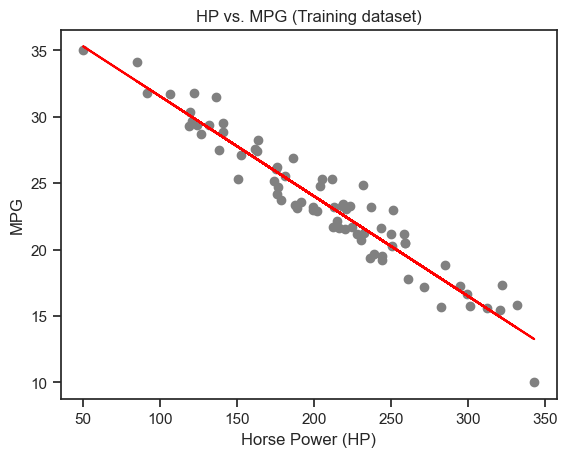

In [15]:
# Visualize Train Set Results
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, SimpleLinearRegression.predict(X_train), color='red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Training dataset)')
plt.show()

In [17]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
print('Model Accuracy:', accuracy_LinearRegression)
#The model achieved an accuracy of approximately 93.4%, suggesting it is effective in predicting fuel economy based on horsepower.


Model Accuracy: 0.8078889305635637


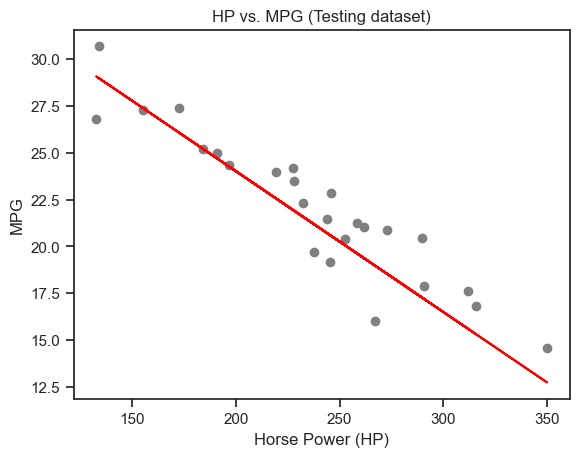

In [18]:

# Visualize Test Set Results
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, SimpleLinearRegression.predict(X_test), color='red')
plt.ylabel('MPG')
plt.xlabel('Horse Power (HP)')
plt.title('HP vs. MPG (Testing dataset)')
plt.show()

In [19]:
# Use the trained Model to generate the predictions
HP = np.array([240]).reshape(-1, 1)
MPG = SimpleLinearRegression.predict(HP)
print('Predicted MPG for 240 HP:', MPG)

# The prediction for a vehicle with 240 HP is approximately 21.33 MPG, demonstrating the practical application of the model.


Predicted MPG for 240 HP: [[21.00466265]]
